In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from bart_playground import *

In [3]:
notebook = "real1_Abalone_init"

In [4]:
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
X = X.drop(columns=['Sex'])

In [5]:
X.shape

(4177, 7)

In [6]:
X = X.values.astype(float)
y = np.array(y).reshape(-1)

In [7]:
ndpost = 100
n_trees = 100

In [8]:
bart_default = DefaultBART(ndpost=ndpost, nskip=0, n_trees=n_trees)
bart_default.fit(X, y)

Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Iterations: 100%|██████████| 100/100 [00:03<00:00, 32.85it/s]


In [9]:
tree_ids = list(range(n_trees))
bart_default.trace[50].leaf_basis(tree_ids).shape

(4177, 259)

In [10]:
bart_default.trace[50].leaf_basis(tree_ids)

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]], dtype=float32)

In [11]:
import numpy as np
from scipy.linalg import subspace_angles

tree_ids = list(range(n_trees))

basis1 = bart_default.trace[50].leaf_basis(tree_ids)  # shape: (n_samples, n_basis1)
basis2 = bart_default.trace[51].leaf_basis(tree_ids)  # shape: (n_samples, n_basis2)

U, _ = np.linalg.qr(basis1)
V, _ = np.linalg.qr(basis2)

angles = subspace_angles(U, V)

subspace_dist = np.linalg.norm(angles)

print("Subspace angles (radians):", angles)
print("Grassmann distance:", subspace_dist)

Subspace angles (radians): [1.5680559e+00 1.5565562e+00 1.5548614e+00 1.5493505e+00 1.5420220e+00
 1.5332980e+00 1.5293612e+00 1.5208418e+00 1.5168264e+00 1.5018053e+00
 1.4903386e+00 1.4880223e+00 1.4838377e+00 1.4717069e+00 1.4651604e+00
 1.4650159e+00 1.4537487e+00 1.4459908e+00 1.4353309e+00 1.4295242e+00
 1.4167759e+00 1.4096711e+00 1.3942062e+00 1.3773241e+00 1.3536360e+00
 1.3480723e+00 1.3387876e+00 1.3362942e+00 1.3127322e+00 1.2719752e+00
 1.2678274e+00 1.2538421e+00 1.2357297e+00 1.2189832e+00 1.2149665e+00
 1.1950548e+00 1.1896867e+00 1.1763055e+00 1.1628590e+00 1.1541401e+00
 1.1483970e+00 1.1223013e+00 1.1074030e+00 1.0995036e+00 1.0806983e+00
 1.0408136e+00 1.0388836e+00 1.0293354e+00 1.0058588e+00 9.8920536e-01
 9.7182643e-01 9.4091290e-01 9.2665744e-01 9.0543664e-01 8.9482743e-01
 8.7766480e-01 8.5749632e-01 8.4683233e-01 8.1832588e-01 8.0579025e-01
 7.8456819e-01 7.7625734e-01 7.5296003e-01 7.2786391e-01 7.2304231e-01
 7.0763063e-01 7.0126384e-01 6.7943323e-01 6.54147

In [12]:
def subspace_distance(U, V):
    # U: n x p, V: n x q (orthonormal columns)
    M = U.T @ V
    _, s, _ = np.linalg.svd(M)
    # principal angles
    theta = np.arccos(np.clip(s, -1, 1))
    # subspace distance
    d= np.linalg.norm(theta)
    return theta, d

theta, d = subspace_distance(U, V)
print("principal angles:", theta)
print("subspace distance:", d)

principal angles: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.

Time taken for distance calculations: 55.34 seconds


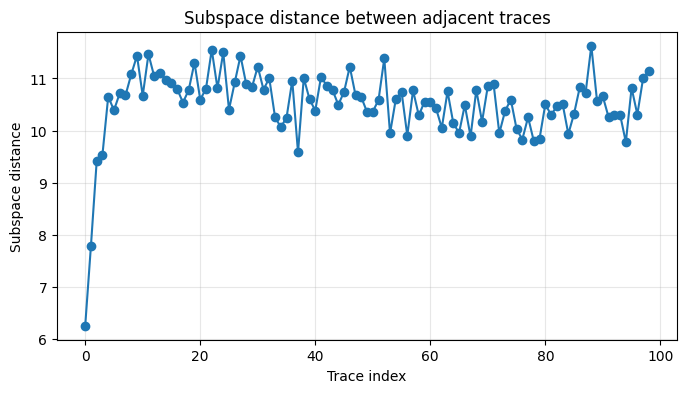

In [13]:
import time
import numpy as np
from scipy.linalg import subspace_angles
import matplotlib.pyplot as plt

start = time.time()

tree_ids = list(range(n_trees))

distances = []
for i in range(ndpost - 1):
    basis1 = bart_default.trace[i].leaf_basis(tree_ids)
    basis2 = bart_default.trace[i + 1].leaf_basis(tree_ids)
    U, _ = np.linalg.qr(basis1)
    V, _ = np.linalg.qr(basis2)
    angles = subspace_angles(U, V)
    dist = np.linalg.norm(angles)
    distances.append(dist)

end = time.time()
print(f"Time taken for distance calculations: {end - start:.2f} seconds")

plt.figure(figsize=(8, 4))
plt.plot(distances, marker='o')
plt.xlabel('Trace index')
plt.ylabel('Subspace distance')
plt.title('Subspace distance between adjacent traces')
plt.grid(True, alpha=0.3)
plt.show()